___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___



<h1 style="font-size:300%;background-color:red;text-align: center;">Audit Prediction with DL</h1>




In [1]:
import pyforest

In [2]:
df=pd.read_csv("Audit data.csv")

<IPython.core.display.Javascript object>

* https://data.mendeley.com/datasets/mmcczp3g3y/3

In [3]:
df.head()

Company_id  Year  Unique_identifier  \
0           1  2008            6000525   
1           1  2009            6000525   
2           1  2010            6000525   
3           1  2011            6000525   
4           1  2012            6000525   

                                        Company_name         Legal_form  \
0  BOMEX EXPORT IMPORT  PREDUZE?E ZA PROIZVODNJU ...  Limited liability   
1  BOMEX EXPORT IMPORT  PREDUZE?E ZA PROIZVODNJU ...  Limited liability   
2  BOMEX EXPORT IMPORT  PREDUZE?E ZA PROIZVODNJU ...  Limited liability   
3  BOMEX EXPORT IMPORT  PREDUZE?E ZA PROIZVODNJU ...  Limited liability   
4  BOMEX EXPORT IMPORT  PREDUZE?E ZA PROIZVODNJU ...  Limited liability   

  Year_of_establishment  Industry_code  Bankruptcy  Restructuring    CEO_id  \
0            1992-06-04         4690.0           0              0  2.10E+11   
1            1992-06-04         4690.0           0              0  2.10E+11   
2            1992-06-04         4690.0           0              0  2.10E+11   
3            1992-06-04         4690.0           0              0  2.10E+11   
4            1992-06-04         4690.0           0              0  2.10E+11   

   ... AOP690 AOP691  AOP692  AOP693 AOP694  AOP695  AOP696  AOP697  AOP698  \
0  ...      0      0       0       0      0       0       0       0       0   
1  ...      0      0       0       0      0       0       0       0       0   
2  ...      0      0       0       0      0       0       0       0       0   
3  ...      0      0       0       0      0       0       0       0       0   
4  ...      0      0       0       0      0       0       0       0       0   

   AOP699  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 411 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22394 entries, 0 to 22393
Columns: 411 entries, Company_id to AOP699
dtypes: float64(383), int64(21), object(7)
memory usage: 70.2+ MB


### EDA 

In [5]:
df.isnull().sum().sort_values().tail(10)
# check num missing values  
# Not: Eğer target sütunumuzda null value varsa direk düşürüyoruz. Çünkü o değerleri herhangi bir değerle (ortalama vb.) doldurmamız doğru olmaz.

AOP565                       1
Industry_code              673
Year_of_establishment      679
CEO_id                     848
Audit_opinion             8833
Big4                      8833
Auditor_id                8833
Audit_opinion_1_code      8833
Auditor_name              8833
Auditor_switch           12921
dtype: int64

In [6]:
# check number of unique values in features
for col in df.columns:
    print(col,":",df[col].nunique())

Company_id : 4701
Year : 6
Unique_identifier : 4701
Company_name : 4701
Legal_form : 9
Year_of_establishment : 3005
Industry_code : 399
Bankruptcy : 2
Restructuring : 2
CEO_id : 154
Auditor_switch : 2
Auditor_name : 64
Auditor_id : 64
Big4 : 2
Audit_opinion : 4
Audit_opinion_1_code : 2
AOP001 : 22121
AOP002 : 414
AOP003 : 156
AOP004 : 8481
AOP005 : 21968
AOP006 : 21879
AOP007 : 5117
AOP008 : 1272
AOP009 : 11447
AOP010 : 7529
AOP011 : 7969
AOP012 : 22304
AOP013 : 21076
AOP014 : 2054
AOP015 : 22239
AOP016 : 22049
AOP017 : 7284
AOP018 : 10888
AOP019 : 17903
AOP020 : 16946
AOP021 : 7051
AOP022 : 22365
AOP023 : 2377
AOP024 : 22367
AOP025 : 8390
AOP101 : 19484
AOP102 : 19888
AOP103 : 414
AOP104 : 8477
AOP105 : 6169
AOP106 : 956
AOP107 : 1592
AOP108 : 18638
AOP109 : 8385
AOP110 : 430
AOP111 : 22336
AOP112 : 6744
AOP113 : 14747
AOP114 : 10802
AOP115 : 9164
AOP116 : 22301
AOP117 : 17719
AOP118 : 35
AOP119 : 22140
AOP120 : 17864
AOP121 : 16956
AOP122 : 5245
AOP123 : 6560
AOP124 : 22367
AOP125 : 

In [7]:
# Detect and define columns created from other columns with the help of suplementary pdf
for col in df.select_dtypes(exclude="object").columns:
    print(col,":",df[col].sum())

Company_id : 48829736
Year : 45024096
Unique_identifier : 264972991884
Industry_code : 82410764.0
Bankruptcy : 18
Restructuring : 867
Auditor_id : 387968.0
Big4 : 1507.0
Audit_opinion_1_code : 4421.0
AOP001 : 276559028.6423
AOP002 : 611085.596
AOP003 : 695426.2877000001
AOP004 : 8556655.366799999
AOP005 : 217297829.25129998
AOP006 : 198444009.18129998
AOP007 : 13656555.2074
AOP008 : 4941887.6844
AOP009 : 49229903.624699995
AOP010 : 40891066.8239
AOP011 : 8264478.656699999
AOP012 : 146944559.7095
AOP013 : 42938079.92919999
AOP014 : 1987551.0965999998
AOP015 : 101923209.42860001
AOP016 : 64640132.0762
AOP017 : 374550.8173
AOP018 : 17445298.8854
AOP019 : 11174866.407200001
AOP020 : 8119188.041200001
AOP021 : 1447185.1772
AOP022 : 424988277.9404
AOP023 : 19312236.166
AOP024 : 444549163.5949
AOP025 : 55507570.904300004
AOP101 : 208580969.8958
AOP102 : 159574866.0165
AOP103 : 611085.596
AOP104 : 7516182.075500001
AOP105 : 52868118.989999995
AOP106 : 278293.5065
AOP107 : 767022.9442000001
AOP

In [8]:
AOP_list = pd.Series([1,5,9,12,15,22,111,113,116,124,201,213,214,219,220,223,224,229,230,336,337,338,339,343,610,615,622,633,638,650,671,680,688])

<IPython.core.display.Javascript object>

In [9]:
drop_AOP = AOP_list.apply(lambda x: "AOP"+str(x) if len(str(x))==3 else 
                          ("AOP00"+str(x) if len(str(x))==1 else "AOP0"+str(x)) )

drop_AOP

0     AOP001
1     AOP005
2     AOP009
3     AOP012
4     AOP015
5     AOP022
6     AOP111
7     AOP113
8     AOP116
9     AOP124
10    AOP201
11    AOP213
12    AOP214
13    AOP219
14    AOP220
15    AOP223
16    AOP224
17    AOP229
18    AOP230
19    AOP336
20    AOP337
21    AOP338
22    AOP339
23    AOP343
24    AOP610
25    AOP615
26    AOP622
27    AOP633
28    AOP638
29    AOP650
30    AOP671
31    AOP680
32    AOP688
dtype: object

In [10]:
# Drop columns that are created from others
df.drop(drop_AOP,axis=1,inplace=True)

In [11]:
# Check target column distribution
df.Audit_opinion.value_counts(dropna=False)

Unqualified    9140
NaN            8833
Qualified      3706
Disclaimer      644
Adverse          71
Name: Audit_opinion, dtype: int64

In [12]:
df.Audit_opinion_1_code.value_counts(dropna=False)

0.0    9140
NaN    8833
1.0    4421
Name: Audit_opinion_1_code, dtype: int64

In [13]:
# Focus on missing values
df.Auditor_switch.value_counts(dropna=False)

NaN    12921
No      7475
Yes     1998
Name: Auditor_switch, dtype: int64

In [14]:
df.dropna( how ="any", subset=["Audit_opinion"]).isnull().sum().sort_values()

Company_id                  0
AOP461                      0
AOP462                      0
AOP463                      0
AOP464                      0
                         ... 
AOP564                      1
Industry_code             363
Year_of_establishment     367
CEO_id                    424
Auditor_switch           4088
Length: 378, dtype: int64

In [15]:
# Fill nan values in Auditor_switch with "unknown" to save 4088 rows
df["Auditor_switch"]=df.Auditor_switch.fillna("unknown")

In [16]:
# Drop rows that contains missing value in target column
df.dropna( how ="any", subset=["Audit_opinion"],inplace=True)

In [17]:
df.isnull().sum().sort_values()

Company_id                 0
AOP461                     0
AOP462                     0
AOP463                     0
AOP464                     0
                        ... 
AOP558                     1
AOP541                     1
Industry_code            363
Year_of_establishment    367
CEO_id                   424
Length: 378, dtype: int64

In [18]:
# Drop rest of rows which contains missing values
df.dropna(inplace=True)

In [19]:
df.isnull().sum().sort_values()

Company_id    0
AOP538        0
AOP537        0
AOP536        0
AOP535        0
             ..
AOP404        0
AOP403        0
AOP402        0
AOP411        0
AOP699        0
Length: 378, dtype: int64

In [20]:
df.shape

(13132, 378)

In [ ]:
pd.set_option("max_info_columns", 500)
df.info()
pd.reset_option("max_info_columns")

In [21]:
df

Company_id  Year  Unique_identifier  \
2               1  2010            6000525   
3               1  2011            6000525   
4               1  2012            6000525   
8               2  2011            6008933   
9               2  2012            6008933   
...           ...   ...                ...   
22387        4698  2012           29502412   
22388        4698  2013           29502412   
22389        4699  2012           29502447   
22390        4699  2013           29502447   
22393        4701  2012           29502641   

                                            Company_name  \
2      BOMEX EXPORT IMPORT  PREDUZE?E ZA PROIZVODNJU ...   
3      BOMEX EXPORT IMPORT  PREDUZE?E ZA PROIZVODNJU ...   
4      BOMEX EXPORT IMPORT  PREDUZE?E ZA PROIZVODNJU ...   
8      PREDUZE?E ZA PROIZVODNJU TRGOVINU I USLUGE DEL...   
9      PREDUZE?E ZA PROIZVODNJU TRGOVINU I USLUGE DEL...   
...                                                  ...   
22387        AKTOR A.T.E. OGRANAK BEOGRAD (NOVI BEOGRAD)   
22388        AKTOR A.T.E. OGRANAK BEOGRAD (NOVI BEOGRAD)   
22389  CHINA ROAD AND BRIDGE CORPORATION SERBIA OGRAN...   
22390  CHINA ROAD AND BRIDGE CORPORATION SERBIA OGRAN...   
22393  SNC-LAVALIN INTERNATIONAL INC.-OGRANAK, BEOGRA...   

                        Legal_form Year_of_establishment  Industry_code  \
2                Limited liability            1992-06-04         4690.0   
3                Limited liability            1992-06-04         4690.0   
4                Limited liability            1992-06-04         4690.0   
8                Limited liability            1992-06-15         1414.0   
9                Limited liability            1992-06-15         1414.0   
...                            ...                   ...            ...   
22387  Branch of a foreign company            2010-11-26         4211.0   
22388  Branch of a foreign company            2010-11-26         4211.0   
22389  Branch of a foreign company            2010-12-10         4213.0   
22390  Branch of a foreign company            2010-12-10         4213.0   
22393  Branch of a foreign company            2011-07-04         4110.0   

       Bankruptcy  Restructuring     CEO_id  ... AOP690 AOP691  AOP692  \
2               0              0   2.10E+11  ...      0      0       0   
3               0              0   2.10E+11  ...      0      0       0   
4               0              0   2.10E+11  ...      0      0       0   
8               0              0   1.21E+12  ...      0      0       0   
9               0              0   1.21E+12  ...      0      0       0   
...           ...            ...        ...  ...    ...    ...     ...   
22387           0              0  Foreigner  ...      0      0       0   
22388           0              0  Foreigner  ...      0      0       0   
22389           0              0   5.04E+11  ...      0      0       0   
22390           0              0   5.04E+11  ...      0      0       0   
22393           0              0  Foreigner  ...      0      0       0   

       AOP693 AOP694  AOP695  AOP696  AOP697  AOP698  AOP699  
2           0      0       0       0       0       0       0  
3           0      0       0       0       0       0       0  
4           0      0       0       0       0       0       0  
8           0      0       0       0       0       0       0  
9           0      0       0       0       0       0       0  
...       ...    ...     ...     ...     ...     ...     ...  
22387       0      0       0       0       0       0       0  
22388       0      0       0       0       0       0       0  
22389       0      0       0       0       0       0       0  
22390       0      0       0       0       0       0       0  
22393       0      0       0       0       0       0       0  

[13132 rows x 378 columns]

In [22]:
# Convert "Year_of_establishment" feature object to datetime
df["Year_of_establishment"] = pd.to_datetime(df["Year_of_establishment"])

<IPython.core.display.Javascript object>

In [23]:
df["Year_of_establishment"].dt.year

2        1992
3        1992
4        1992
8        1992
9        1992
         ... 
22387    2010
22388    2010
22389    2010
22390    2010
22393    2011
Name: Year_of_establishment, Length: 13132, dtype: int64

In [24]:
# Transform "Year_of_establishment" column into only year 
df["Year_of_establishment"] = df["Year_of_establishment"].dt.year

In [25]:
# Create a new column "company_age" and fill it with the ages of the companies in the report year
df["company_age"] = df["Year"] - df["Year_of_establishment"]
df["company_age"]

2        18
3        19
4        20
8        19
9        20
         ..
22387     2
22388     3
22389     2
22390     3
22393     1
Name: company_age, Length: 13132, dtype: int64

In [26]:
# Drop year related columns to reduce complexity
df.drop(["Year", "Year_of_establishment"],axis=1, inplace=True)

In [27]:
# Check and drop columns that you assume prediction power is too low.
pd.set_option("max_info_columns", 500)
df.info()
pd.reset_option("max_info_columns")

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13132 entries, 2 to 22393
Data columns (total 377 columns):
 #    Column                Non-Null Count  Dtype  
---   ------                --------------  -----  
 0    Company_id            13132 non-null  int64  
 1    Unique_identifier     13132 non-null  int64  
 2    Company_name          13132 non-null  object 
 3    Legal_form            13132 non-null  object 
 4    Industry_code         13132 non-null  float64
 5    Bankruptcy            13132 non-null  int64  
 6    Restructuring         13132 non-null  int64  
 7    CEO_id                13132 non-null  object 
 8    Auditor_switch        13132 non-null  object 
 9    Auditor_name          13132 non-null  object 
 10   Auditor_id            13132 non-null  float64
 11   Big4                  13132 non-null  float64
 12   Audit_opinion         13132 non-null  object 
 13   Audit_opinion_1_code  13132 non-null  float64
 14   AOP002                13132 non-null  float64
 15   

<IPython.core.display.Javascript object>

In [28]:
for col in df.columns:
    print(col,":",df[col].nunique())

Company_id : 4146
Unique_identifier : 4146
Company_name : 4146
Legal_form : 9
Industry_code : 396
Bankruptcy : 2
Restructuring : 2
CEO_id : 154
Auditor_switch : 3
Auditor_name : 63
Auditor_id : 63
Big4 : 2
Audit_opinion : 4
Audit_opinion_1_code : 2
AOP002 : 233
AOP003 : 117
AOP004 : 5480
AOP006 : 12937
AOP007 : 3227
AOP008 : 796
AOP010 : 4604
AOP011 : 4966
AOP013 : 12578
AOP014 : 1412
AOP016 : 13019
AOP017 : 4646
AOP018 : 6924
AOP019 : 11125
AOP020 : 10536
AOP021 : 4759
AOP023 : 1263
AOP024 : 13118
AOP025 : 5497
AOP101 : 11754
AOP102 : 11757
AOP103 : 233
AOP104 : 5306
AOP105 : 3774
AOP106 : 604
AOP107 : 1026
AOP108 : 11338
AOP109 : 4682
AOP110 : 302
AOP112 : 4549
AOP114 : 6695
AOP115 : 5628
AOP117 : 10589
AOP118 : 24
AOP119 : 13039
AOP120 : 10725
AOP121 : 10425
AOP122 : 3631
AOP123 : 4342
AOP125 : 5497
AOP202 : 12834
AOP203 : 4075
AOP204 : 3466
AOP205 : 2732
AOP206 : 8459
AOP207 : 13110
AOP208 : 10032
AOP209 : 12766
AOP210 : 12871
AOP211 : 12359
AOP212 : 12946
AOP215 : 11040
AOP216 : 1

In [29]:
df.drop(["Company_id","Unique_identifier","Company_name"],axis=1,inplace=True)

In [30]:
pd.set_option("max_info_columns", 500)
df.info()
pd.reset_option("max_info_columns")

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13132 entries, 2 to 22393
Data columns (total 374 columns):
 #    Column                Non-Null Count  Dtype  
---   ------                --------------  -----  
 0    Legal_form            13132 non-null  object 
 1    Industry_code         13132 non-null  float64
 2    Bankruptcy            13132 non-null  int64  
 3    Restructuring         13132 non-null  int64  
 4    CEO_id                13132 non-null  object 
 5    Auditor_switch        13132 non-null  object 
 6    Auditor_name          13132 non-null  object 
 7    Auditor_id            13132 non-null  float64
 8    Big4                  13132 non-null  float64
 9    Audit_opinion         13132 non-null  object 
 10   Audit_opinion_1_code  13132 non-null  float64
 11   AOP002                13132 non-null  float64
 12   AOP003                13132 non-null  float64
 13   AOP004                13132 non-null  float64
 14   AOP006                13132 non-null  float64
 15   

<IPython.core.display.Javascript object>

In [31]:
df.drop(["CEO_id","Auditor_name","Auditor_id"],axis=1,inplace=True)

In [32]:
# Detect and correct the type of object columns
df.select_dtypes(include="object")

Legal_form Auditor_switch Audit_opinion
2                Limited liability        unknown   Unqualified
3                Limited liability             No     Qualified
4                Limited liability            Yes       Adverse
8                Limited liability        unknown   Unqualified
9                Limited liability             No   Unqualified
...                            ...            ...           ...
22387  Branch of a foreign company             No    Disclaimer
22388  Branch of a foreign company             No     Qualified
22389  Branch of a foreign company             No   Unqualified
22390  Branch of a foreign company            Yes     Qualified
22393  Branch of a foreign company             No   Unqualified

[13132 rows x 3 columns]

In [33]:
df.head()

Legal_form  Industry_code  Bankruptcy  Restructuring Auditor_switch  \
2  Limited liability         4690.0           0              0        unknown   
3  Limited liability         4690.0           0              0             No   
4  Limited liability         4690.0           0              0            Yes   
8  Limited liability         1414.0           0              0        unknown   
9  Limited liability         1414.0           0              0             No   

   Big4 Audit_opinion  Audit_opinion_1_code  AOP002  AOP003  ...  AOP691  \
2   0.0   Unqualified                   0.0     0.0     0.0  ...       0   
3   0.0     Qualified                   1.0     0.0     0.0  ...       0   
4   0.0       Adverse                   1.0     0.0     0.0  ...       0   
8   0.0   Unqualified                   0.0     0.0     0.0  ...       0   
9   0.0   Unqualified                   0.0     0.0     0.0  ...       0   

   AOP692  AOP693  AOP694  AOP695  AOP696  AOP697  AOP698  AOP699  company_age  
2       0       0       0       0       0       0       0       0           18  
3       0       0       0       0       0       0       0       0           19  
4       0       0       0       0       0       0       0       0           20  
8       0       0       0       0       0       0       0       0           19  
9       0       0       0       0       0       0       0       0           20  

[5 rows x 371 columns]

In [34]:
df["Industry_code"] = df["Industry_code"].astype("str")
df["Bankruptcy"] = df["Bankruptcy"].astype("str")
df["Big4"] = df["Big4"].astype("str")
df["Restructuring"] = df["Restructuring"].astype("str")

In [35]:
df.select_dtypes(include="object")

Legal_form Industry_code Bankruptcy Restructuring  \
2                Limited liability        4690.0          0             0   
3                Limited liability        4690.0          0             0   
4                Limited liability        4690.0          0             0   
8                Limited liability        1414.0          0             0   
9                Limited liability        1414.0          0             0   
...                            ...           ...        ...           ...   
22387  Branch of a foreign company        4211.0          0             0   
22388  Branch of a foreign company        4211.0          0             0   
22389  Branch of a foreign company        4213.0          0             0   
22390  Branch of a foreign company        4213.0          0             0   
22393  Branch of a foreign company        4110.0          0             0   

      Auditor_switch Big4 Audit_opinion  
2            unknown  0.0   Unqualified  
3                 No  0.0     Qualified  
4                Yes  0.0       Adverse  
8            unknown  0.0   Unqualified  
9                 No  0.0   Unqualified  
...              ...  ...           ...  
22387             No  0.0    Disclaimer  
22388             No  0.0     Qualified  
22389             No  0.0   Unqualified  
22390            Yes  0.0     Qualified  
22393             No  0.0   Unqualified  

[13132 rows x 7 columns]

In [36]:
pd.set_option("max_info_columns", 500)
df.info()
pd.reset_option("max_info_columns")

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13132 entries, 2 to 22393
Data columns (total 371 columns):
 #    Column                Non-Null Count  Dtype  
---   ------                --------------  -----  
 0    Legal_form            13132 non-null  object 
 1    Industry_code         13132 non-null  object 
 2    Bankruptcy            13132 non-null  object 
 3    Restructuring         13132 non-null  object 
 4    Auditor_switch        13132 non-null  object 
 5    Big4                  13132 non-null  object 
 6    Audit_opinion         13132 non-null  object 
 7    Audit_opinion_1_code  13132 non-null  float64
 8    AOP002                13132 non-null  float64
 9    AOP003                13132 non-null  float64
 10   AOP004                13132 non-null  float64
 11   AOP006                13132 non-null  float64
 12   AOP007                13132 non-null  float64
 13   AOP008                13132 non-null  float64
 14   AOP010                13132 non-null  float64
 15   

<IPython.core.display.Javascript object>

In [37]:
df.describe()

Audit_opinion_1_code         AOP002         AOP003         AOP004  \
count          13132.000000   13132.000000   13132.000000   13132.000000   
mean               0.322495      24.328470      42.458674     405.744669   
std                0.467449    1405.927493    1996.140718    5465.414763   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       0.000000   
50%                0.000000       0.000000       0.000000       0.306800   
75%                1.000000       0.000000       0.000000      13.241900   
max                1.000000  150800.004200  208023.623100  217999.596200   

             AOP006         AOP007         AOP008        AOP010  \
count  1.313200e+04   13132.000000   13132.000000  1.313200e+04   
mean   7.861990e+03     641.736812     235.475604  1.868777e+03   
std    8.400120e+04    6347.291457    8566.248673  4.829494e+04   
min    0.000000e+00       0.000000       0.000000  0.000000e+00   
25%    3.615491e+02       0.000000       0.000000  0.000000e+00   
50%    1.143658e+03       0.000000       0.000000  0.000000e+00   
75%    3.094480e+03       0.000000       0.000000  1.209965e+01   
max    4.094721e+06  323282.760400  500953.976900  2.806065e+06   

              AOP011         AOP013  ...         AOP691        AOP692  \
count   13132.000000   13132.000000  ...   13132.000000  1.313200e+04   
mean      424.372752    2030.436970  ...     230.348538  9.261925e+02   
std      6858.883322    8563.920893  ...    7148.913023  3.668773e+04   
min         0.000000       0.000000  ...       0.000000  0.000000e+00   
25%         0.000000     115.895375  ...       0.000000  0.000000e+00   
50%         0.000000     542.183150  ...       0.000000  0.000000e+00   
75%        14.296925    1465.863950  ...       0.000000  0.000000e+00   
max    310704.116300  383464.983200  ...  731768.000000  3.478877e+06   

             AOP693        AOP694         AOP695        AOP696        AOP697  \
count  1.313200e+04  13132.000000   13132.000000  1.313200e+04  13132.000000   
mean   1.703049e+03     56.407935     350.752818  1.408704e+03      2.700883   
std    4.120485e+04   1205.014440    6706.817154  3.909132e+04    127.998043   
min    0.000000e+00      0.000000       0.000000  0.000000e+00      0.000000   
25%    0.000000e+00      0.000000       0.000000  0.000000e+00      0.000000   
50%    0.000000e+00      0.000000       0.000000  0.000000e+00      0.000000   
75%    0.000000e+00      0.000000       0.000000  0.000000e+00      0.000000   
max    2.605005e+06  64490.000000  311561.000000  2.523660e+06  12696.000000   

             AOP698        AOP699   company_age  
count  13132.000000  13132.000000  13132.000000  
mean       2.824931      1.586582     15.693345  
std      183.245298    113.985361     11.178968  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      9.000000  
50%        0.000000      0.000000     13.000000  
75%        0.000000      0.000000     20.000000  
max    16906.000000  12696.000000     95.000000  

[8 rows x 364 columns]

In [38]:
# Check the corelation between target and feature columns
import plotly.express as px
fig = px.bar(x=df.corr()["Audit_opinion_1_code"].sort_values(), y= df.corr()["Audit_opinion_1_code"].sort_values().index)
fig.show()
# df.corr()["Audit_opinion_1_code"].sort_values().plot.barh(figsize=(20,20))

In [39]:
# Check multicollinearity
fig = px.imshow(df.corr(),
                x= df.select_dtypes(exclude="object").columns,
                y= df.select_dtypes(exclude="object").columns
               )
fig.update_xaxes(side="top")
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

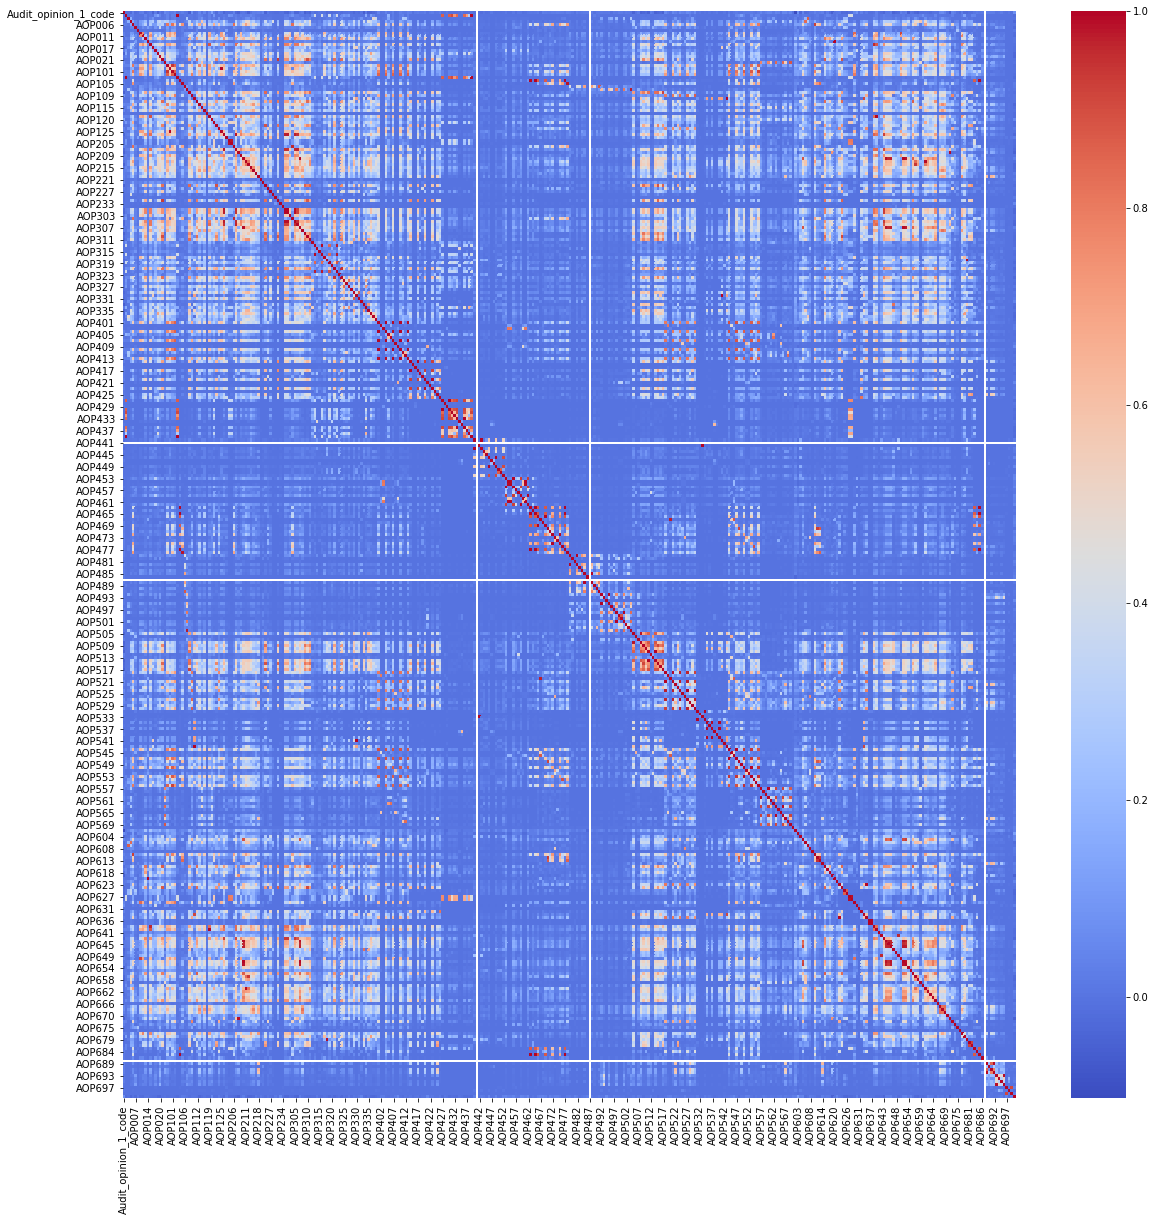

In [40]:
# Check multicollinearity
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap="coolwarm")

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Data Preprocessing 

In [42]:
# No need to use values attribute bc we will scale the data
X = df.drop(["Audit_opinion_1_code","Audit_opinion"],axis=1)
y = df.Audit_opinion_1_code

In [43]:
X = pd.get_dummies(X,drop_first=True)

<IPython.core.display.Javascript object>

In [44]:
X.shape

(13132, 771)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.20,random_state=6)

In [47]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model-1 (Straight Forward)

In [48]:
model = Sequential()
model.add(Dense(48, activation="relu"))
model.add(Dense(24, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["Recall"])

In [49]:
model.fit(x=X_train_scaled, y=y_train, epochs=100, 
          validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/100
329/329 [==============================] - 1s 1ms/step - loss: 0.5924 - recall: 0.1582 - val_loss: 0.5579 - val_recall: 0.2667
Epoch 2/100
329/329 [==============================] - 0s 748us/step - loss: 0.5435 - recall: 0.3398 - val_loss: 0.5547 - val_recall: 0.4702
Epoch 3/100
329/329 [==============================] - 0s 748us/step - loss: 0.5199 - recall: 0.3987 - val_loss: 0.5452 - val_recall: 0.3435
Epoch 4/100
329/329 [==============================] - 0s 781us/step - loss: 0.5049 - recall: 0.4344 - val_loss: 0.5456 - val_recall: 0.4080
Epoch 5/100
329/329 [==============================] - 0s 763us/step - loss: 0.4871 - recall: 0.4631 - val_loss: 0.5441 - val_recall: 0.3752
Epoch 6/100
329/329 [==============================] - 0s 760us/step - loss: 0.4734 - recall: 0.4880 - val_loss: 0.5639 - val_recall: 0.5298
Epoch 7/100
329/329 [==============================] - 0s 757us/step - loss: 0.4612 - recall: 0.5062 - val_loss: 0.5599 - val_recall: 0.4348
Epoch 8/100
329

### Evaluate-1

In [50]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

<IPython.core.display.Javascript object>

loss    recall  val_loss  val_recall
0  0.592426  0.158172  0.557875    0.266748
1  0.543545  0.339777  0.554714    0.470158
2  0.519851  0.398653  0.545192    0.343484
3  0.504890  0.434388  0.545596    0.408039
4  0.487067  0.463093  0.544086    0.375152

<AxesSubplot:>

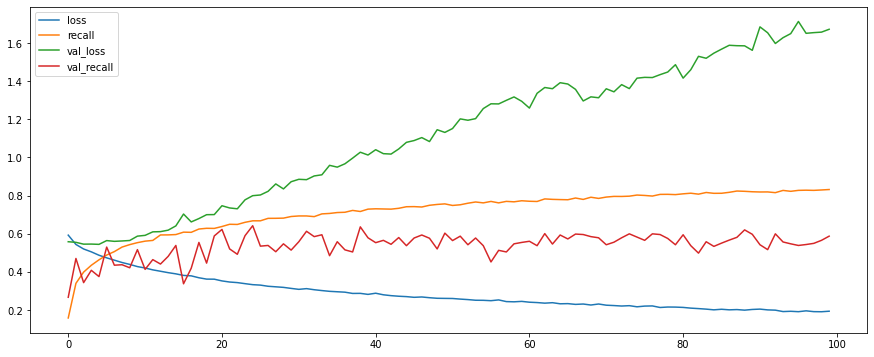

In [51]:
model_loss.plot(figsize=(15,6))

In [52]:
predictions = model.predict_classes(X_test_scaled)
predictions_train = model.predict_classes(X_train_scaled)

C:\Users\Ertuğrul\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



In [53]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

[[1509  297]
 [ 339  482]]
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83      1806
         1.0       0.62      0.59      0.60       821

    accuracy                           0.76      2627
   macro avg       0.72      0.71      0.71      2627
weighted avg       0.75      0.76      0.76      2627

[[6816  275]
 [ 463 2951]]
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      7091
         1.0       0.91      0.86      0.89      3414

    accuracy                           0.93     10505
   macro avg       0.93      0.91      0.92     10505
weighted avg       0.93      0.93      0.93     10505



###  Model-2 (Early Stop)

In [54]:
model = Sequential()
model.add(Dense(48, activation="relu"))
model.add(Dense(24, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["Recall"])

In [55]:
pd.Series(y_train).value_counts(normalize=True)

<IPython.core.display.Javascript object>

0.0    0.675012
1.0    0.324988
Name: Audit_opinion_1_code, dtype: float64

In [56]:
pd.Series(y_train).value_counts(normalize=True)

weights = {0:32, 1:68}
weights

<IPython.core.display.Javascript object>

{0: 32, 1: 68}

In [57]:
early_stop = EarlyStopping(monitor="val_loss", mode="auto", verbose=1, 
                           patience = 50,restore_best_weights=True)
# Not: restore_best_weights EarlyStopping sonrası epoch lar içerisindeki en iyi sonucun ağırlığını alır. Çünkü patience sayısı boyunca değerlerde düşme ve yükselmeler olabilir. Eğer bu parametre yi kullanmazsak en son değerin ağırlığını alır. 

In [58]:
model.fit(x=X_train_scaled, y=y_train, epochs=150, 
          validation_data=(X_test_scaled, y_test), 
          verbose=1,class_weight = weights, callbacks=[early_stop])
# loss train datamızın cost değerini, val_loss test datamızın cost değerini gösterir.

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/150
329/329 [==============================] - 1s 1ms/step - loss: 28.2255 - recall: 0.5381 - val_loss: 0.6048 - val_recall: 0.5773
Epoch 2/150
329/329 [==============================] - 0s 803us/step - loss: 26.0159 - recall: 0.6927 - val_loss: 0.6919 - val_recall: 0.7942
Epoch 3/150
329/329 [==============================] - 0s 800us/step - loss: 25.0067 - recall: 0.7118 - val_loss: 0.5858 - val_recall: 0.5944
Epoch 4/150
329/329 [==============================] - 0s 790us/step - loss: 24.1101 - recall: 0.7062 - val_loss: 0.6268 - val_recall: 0.7247
Epoch 5/150
329/329 [==============================] - 0s 793us/step - loss: 23.2346 - recall: 0.7311 - val_loss: 0.5949 - val_recall: 0.6382
Epoch 6/150
329/329 [==============================] - 0s 842us/step - loss: 22.4258 - recall: 0.7361 - val_loss: 0.6281 - val_recall: 0.7113
Epoch 7/150


### Evaluate-2

In [59]:
model_loss = pd.DataFrame(model.history.history)
model_loss.tail()

<IPython.core.display.Javascript object>

loss    recall  val_loss  val_recall
48  12.069649  0.867311  1.296619    0.593179
49  11.707177  0.879028  1.366272    0.599269
50  11.656847  0.884300  1.326336    0.622412
51  11.592272  0.879320  1.410604    0.666261
52  11.430887  0.882250  1.419521    0.644336

<AxesSubplot:>

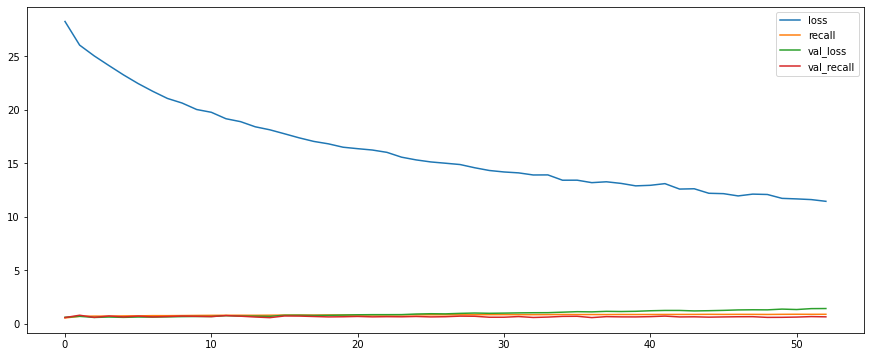

In [60]:
model_loss.plot(figsize=(15,6))

* https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

In [61]:
predictions = model.predict_classes(X_test_scaled)
predictions_train = model.predict_classes(X_train_scaled)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

C:\Users\Ertuğrul\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[[1360  446]
 [ 333  488]]
              precision    recall  f1-score   support

         0.0       0.80      0.75      0.78      1806
         1.0       0.52      0.59      0.56       821

    accuracy                           0.70      2627
   macro avg       0.66      0.67      0.67      2627
weighted avg       0.72      0.70      0.71      2627

[[5614 1477]
 [1231 2183]]
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81      7091
         1.0       0.60      0.64      0.62      3414

    accuracy                           0.74     10505
   macro avg       0.71      0.72      0.71     10505
weighted avg       0.75      0.74      0.74     10505



### Model-3 (Early Stop with Drop Out)

In [62]:
model = Sequential()
model.add(Dense(24, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(24, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(12, activation="relu"))
model.add(Dropout(0.4))


model.add(Dense(1, activation="sigmoid"))

opt1 = tf.keras.optimizers.Adam(learning_rate=0.001)
opt2 = tf.keras.optimizers.Adamax(learning_rate=0.001)
model.compile(loss="binary_crossentropy", optimizer=opt1, metrics=["Recall"])

In [63]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", 
                           verbose=1, patience = 25, restore_best_weights=True)

In [64]:
model.fit(x=X_train_scaled, y=y_train, epochs=600, 
          validation_data=(X_test_scaled, y_test), 
          verbose=1, class_weight = weights, callbacks=[early_stop])

Epoch 1/600
329/329 [==============================] - 1s 1ms/step - loss: 29.7378 - recall: 0.5917 - val_loss: 0.6690 - val_recall: 0.5128
Epoch 2/600
329/329 [==============================] - 0s 857us/step - loss: 28.5658 - recall: 0.5278 - val_loss: 0.6387 - val_recall: 0.5238
Epoch 3/600
329/329 [==============================] - 0s 851us/step - loss: 27.6594 - recall: 0.5721 - val_loss: 0.6191 - val_recall: 0.5591
Epoch 4/600
329/329 [==============================] - 0s 861us/step - loss: 27.0286 - recall: 0.5961 - val_loss: 0.6023 - val_recall: 0.5262
Epoch 5/600
329/329 [==============================] - 0s 857us/step - loss: 26.7669 - recall: 0.6145 - val_loss: 0.6226 - val_recall: 0.6395
Epoch 6/600
329/329 [==============================] - 0s 867us/step - loss: 26.2184 - recall: 0.6508 - val_loss: 0.6085 - val_recall: 0.6309
Epoch 7/600
329/329 [==============================] - 0s 861us/step - loss: 26.0100 - recall: 0.6485 - val_loss: 0.5968 - val_recall: 0.6005
Epoch 8/

### Evaluate-3

In [65]:
model_loss = pd.DataFrame(model.history.history)
model_loss.tail()

<IPython.core.display.Javascript object>

loss    recall  val_loss  val_recall
28  22.627823  0.726714  0.660256    0.694275
29  22.756891  0.731400  0.646609    0.661389
30  22.891243  0.720270  0.667114    0.734470
31  22.741898  0.714118  0.653006    0.674787
32  22.386654  0.705917  0.657787    0.679659

<AxesSubplot:>

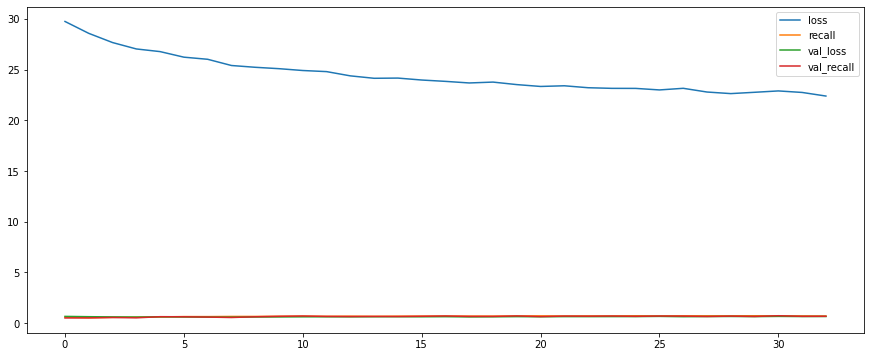

In [66]:

model_loss.plot(figsize=(15,6))

In [67]:
predictions = model.predict_classes(X_test_scaled)
predictions_train = model.predict_classes(X_train_scaled)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

C:\Users\Ertuğrul\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



[[1405  401]
 [ 362  459]]
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79      1806
         1.0       0.53      0.56      0.55       821

    accuracy                           0.71      2627
   macro avg       0.66      0.67      0.67      2627
weighted avg       0.71      0.71      0.71      2627

[[5772 1319]
 [1296 2118]]
              precision    recall  f1-score   support

         0.0       0.82      0.81      0.82      7091
         1.0       0.62      0.62      0.62      3414

    accuracy                           0.75     10505
   macro avg       0.72      0.72      0.72     10505
weighted avg       0.75      0.75      0.75     10505



---

## ML Comparision

## XGBoost

In [68]:
from xgboost import XGBClassifier

In [69]:
xgb = XGBClassifier()

In [70]:
xgb.fit(X_train_scaled,y_train)

C:\Users\Ertuğrul\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[21:57:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
predictions = xgb.predict(X_test_scaled)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1615  191]
 [ 386  435]]
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85      1806
         1.0       0.69      0.53      0.60       821

    accuracy                           0.78      2627
   macro avg       0.75      0.71      0.72      2627
weighted avg       0.77      0.78      0.77      2627



### My lovely Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
log_mod = LogisticRegression(class_weight="balanced", max_iter=5000)

In [74]:
log_mod.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced', max_iter=5000)

In [75]:
predictions = log_mod.predict(X_test_scaled)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1200  606]
 [ 302  519]]
              precision    recall  f1-score   support

         0.0       0.80      0.66      0.73      1806
         1.0       0.46      0.63      0.53       821

    accuracy                           0.65      2627
   macro avg       0.63      0.65      0.63      2627
weighted avg       0.69      0.65      0.67      2627

